In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock-prices.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2000-01-03,26.529263,26.751080,25.597633,25.863813,12019200,0.000000,0.0,JPM
1,2000-01-04,25.207081,25.407846,24.694017,25.296310,11723400,0.273333,0.0,JPM
2,2000-01-05,25.073238,25.898603,24.627096,25.140160,8714550,0.000000,0.0,JPM
3,2000-01-06,25.028630,26.032452,24.894787,25.497080,8369250,0.000000,0.0,JPM
4,2000-01-07,25.920907,26.233207,25.340920,25.965521,6571950,0.000000,0.0,JPM


In [3]:
# Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107559 entries, 0 to 107558
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          107559 non-null  object 
 1   Open          107559 non-null  float64
 2   High          107559 non-null  float64
 3   Low           107559 non-null  float64
 4   Close         107559 non-null  float64
 5   Volume        107559 non-null  int64  
 6   Dividends     107559 non-null  float64
 7   Stock Splits  107559 non-null  float64
 8   Company       107559 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ MB


In [4]:
# Inspect the dataframe Company column
df.Company.value_counts()

JPM      5405
MAR      5405
CVS      5405
TSN      5405
ADM      5405
GD       5405
NOC      5405
CAT      5405
T        5405
VZ       5405
NHYDY    5405
MS       5405
LIN      5405
AXP      5405
WFC      5405
STT      5405
BK       5405
BAC      5405
GS       5405
CBRE     4291
DOW       573
Name: Company, dtype: int64

In [5]:
# extract the data for one company of interest.
df_JPM = df[df.Company == 'JPM']
df_JPM

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2000-01-03,26.529263,26.751080,25.597633,25.863813,12019200,0.000000,0.0,JPM
1,2000-01-04,25.207081,25.407846,24.694017,25.296310,11723400,0.273333,0.0,JPM
2,2000-01-05,25.073238,25.898603,24.627096,25.140160,8714550,0.000000,0.0,JPM
3,2000-01-06,25.028630,26.032452,24.894787,25.497080,8369250,0.000000,0.0,JPM
4,2000-01-07,25.920907,26.233207,25.340920,25.965521,6571950,0.000000,0.0,JPM
...,...,...,...,...,...,...,...,...,...
5400,2021-06-21,149.080002,151.199997,149.020004,150.429993,18664800,0.000000,0.0,JPM
5401,2021-06-22,150.600006,150.970001,148.660004,150.210007,14251200,0.000000,0.0,JPM
5402,2021-06-23,150.199997,152.039993,150.089996,151.119995,12733300,0.000000,0.0,JPM
5403,2021-06-24,151.919998,153.119995,151.220001,152.509995,13733200,0.000000,0.0,JPM


In [6]:
df_JPM.shape

(5405, 9)

In [7]:
df_JPM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5405 entries, 0 to 5404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5405 non-null   object 
 1   Open          5405 non-null   float64
 2   High          5405 non-null   float64
 3   Low           5405 non-null   float64
 4   Close         5405 non-null   float64
 5   Volume        5405 non-null   int64  
 6   Dividends     5405 non-null   float64
 7   Stock Splits  5405 non-null   float64
 8   Company       5405 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 422.3+ KB


In [8]:
# convert date to datetime object and set as index.
df_JPM.loc[:,'Date'] = pd.to_datetime(df_JPM.loc[:,'Date'])
df_JPM.set_index('Date', inplace=True)
df_JPM

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2000-01-03,26.529263,26.751080,25.597633,25.863813,12019200,0.000000,0.0,JPM
2000-01-04,25.207081,25.407846,24.694017,25.296310,11723400,0.273333,0.0,JPM
2000-01-05,25.073238,25.898603,24.627096,25.140160,8714550,0.000000,0.0,JPM
2000-01-06,25.028630,26.032452,24.894787,25.497080,8369250,0.000000,0.0,JPM
2000-01-07,25.920907,26.233207,25.340920,25.965521,6571950,0.000000,0.0,JPM
...,...,...,...,...,...,...,...,...
2021-06-21,149.080002,151.199997,149.020004,150.429993,18664800,0.000000,0.0,JPM
2021-06-22,150.600006,150.970001,148.660004,150.210007,14251200,0.000000,0.0,JPM
2021-06-23,150.199997,152.039993,150.089996,151.119995,12733300,0.000000,0.0,JPM


In [9]:
df_JPM.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25'],
              dtype='datetime64[ns]', name='Date', length=5405, freq=None)

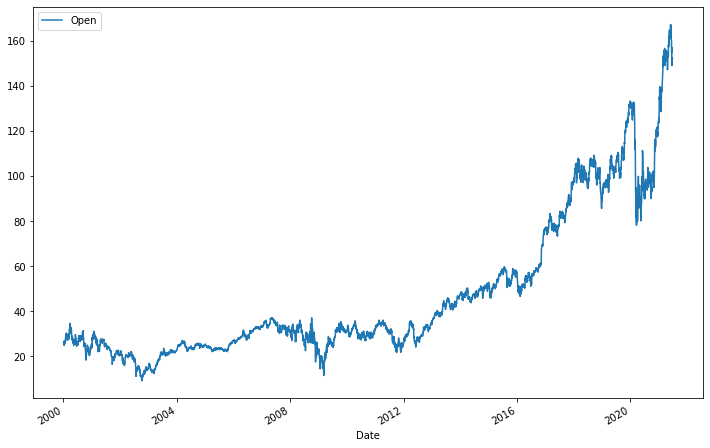

In [10]:
# visualize company stocks time series.
plt.figure(figsize=(12,8))
df_JPM.Open.plot()
# df_JPM.Low.plot()
# df_JPM.High.plot()
# df_JPM.Close.plot()
plt.legend()
plt.show();

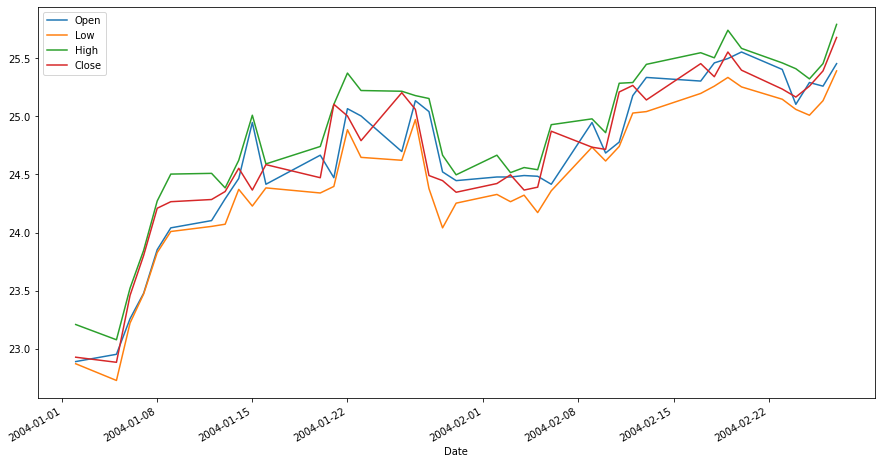

In [11]:
# Closer visualization of the time series.
plt.figure(figsize=(15,8))
df_JPM.Open.loc['2004-01':'2004-02',].plot()
df_JPM.Low.loc['2004-01':'2004-02',].plot()
df_JPM.High.loc['2004-01':'2004-02',].plot()
df_JPM.Close.loc['2004-01':'2004-02',].plot()
plt.legend()
plt.show();

I choose to investigate the Open time series.

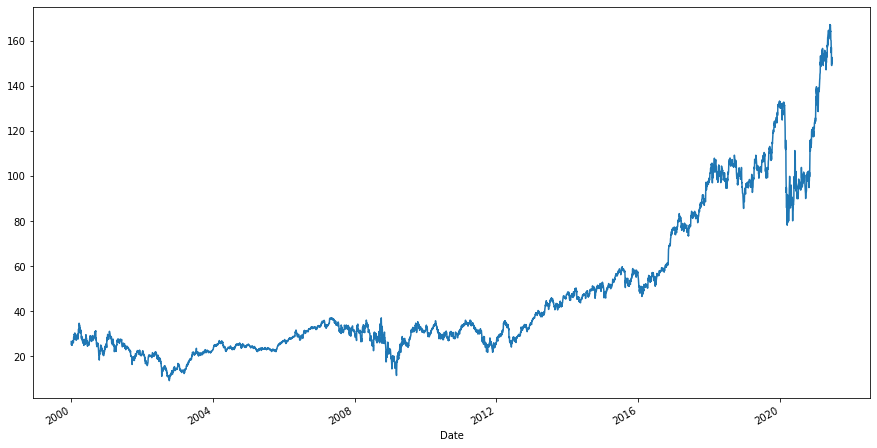

In [12]:
# visualize the open time series alone.
df_JPM.Open.plot(figsize=(15,8))
plt.show();

In [13]:
# Perform the Dickey-Fuller test to confirm type of time series.
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

test_res = adfuller(df_JPM.Open)
print(test_res)
print('Random_walk:', test_res[1] > 0.05)

(1.3844469416629954, 0.9970423287264923, 18, 5386, {'1%': -3.431564708380395, '5%': -2.8620767782199046, '10%': -2.5670557262416116}, 15765.854144389079)
Random_walk: True


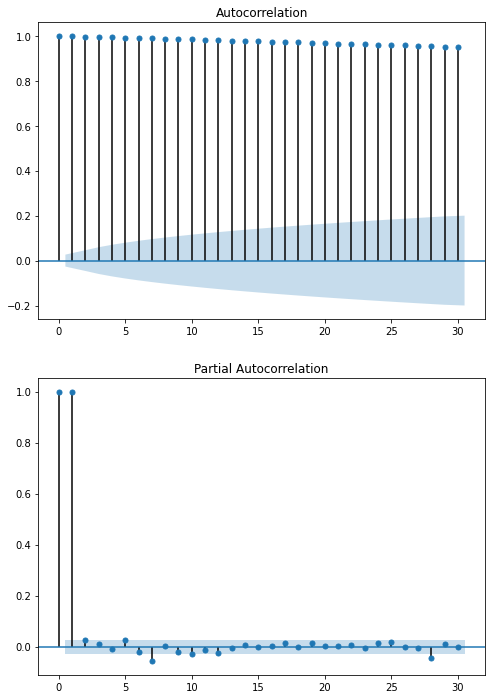

In [14]:
# further confirm random walk
fig, ax = plt.subplots(2,1, figsize=(8,12))

plot_acf(df_JPM.Open, lags=30, alpha=0.05, ax=ax[0])

plot_pacf(df_JPM.Open, lags=30, alpha=0.05, ax=ax[1])
plt.show();

In [15]:
df_JPM.Open.loc[:'2015-12']

Date
2000-01-03    26.529263
2000-01-04    25.207081
2000-01-05    25.073238
2000-01-06    25.028630
2000-01-07    25.920907
                ...    
2015-12-24    57.126490
2015-12-28    56.843525
2015-12-29    57.315151
2015-12-30    57.486651
2015-12-31    56.757785
Name: Open, Length: 4025, dtype: float64

In [16]:
df_JPM.Open.loc['2016-01':]

Date
2016-01-04     55.204849
2016-01-05     54.989027
2016-01-06     54.143041
2016-01-07     53.055346
2016-01-08     52.770487
                 ...    
2021-06-21    149.080002
2021-06-22    150.600006
2021-06-23    150.199997
2021-06-24    151.919998
2021-06-25    152.589996
Name: Open, Length: 1380, dtype: float64

In [17]:
# split data into train and test sets
X_train = df_JPM.Open.loc[:'2021']
X_test = df_JPM.Open.loc['2021':]

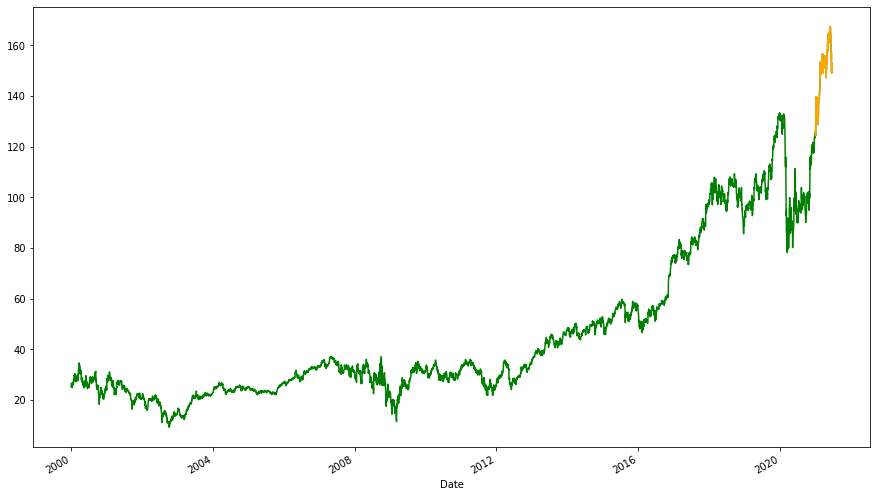

In [18]:
plt.figure(figsize=(15,9))
X_train.plot(color='green')
X_test.plot(color='orange')
plt.show();

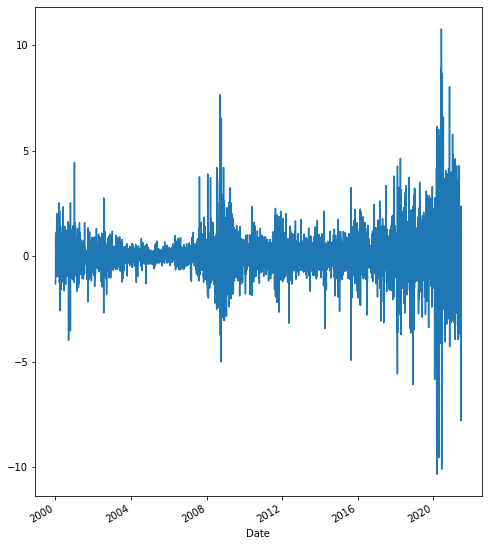

In [19]:
# take first difference to engender stationarity
series_diff = X_train.diff().dropna()

# visualize the difference
series_diff.plot(figsize=(8, 10))
plt.show();

In [20]:
# check the stationarity
test_res = adfuller(series_diff)
print(test_res)
print('Random_walk:', test_res[1] > 0.05)

(-19.786960018800432, 0.0, 13, 5390, {'1%': -3.431563806497193, '5%': -2.862076379760106, '10%': -2.5670555141280667}, 15763.002604347761)
Random_walk: False


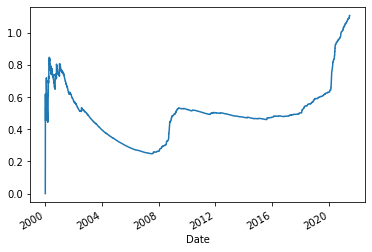

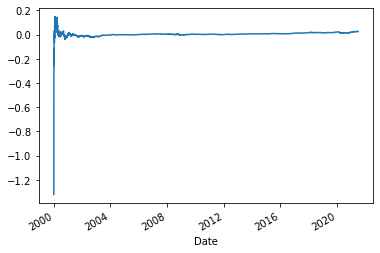

In [21]:
# Check variance and mean of the return.
series_diff.dropna().expanding(min_periods=1).var(ddof=0).plot()
plt.show();

series_diff.dropna().expanding(min_periods=1).mean().plot()
plt.show();

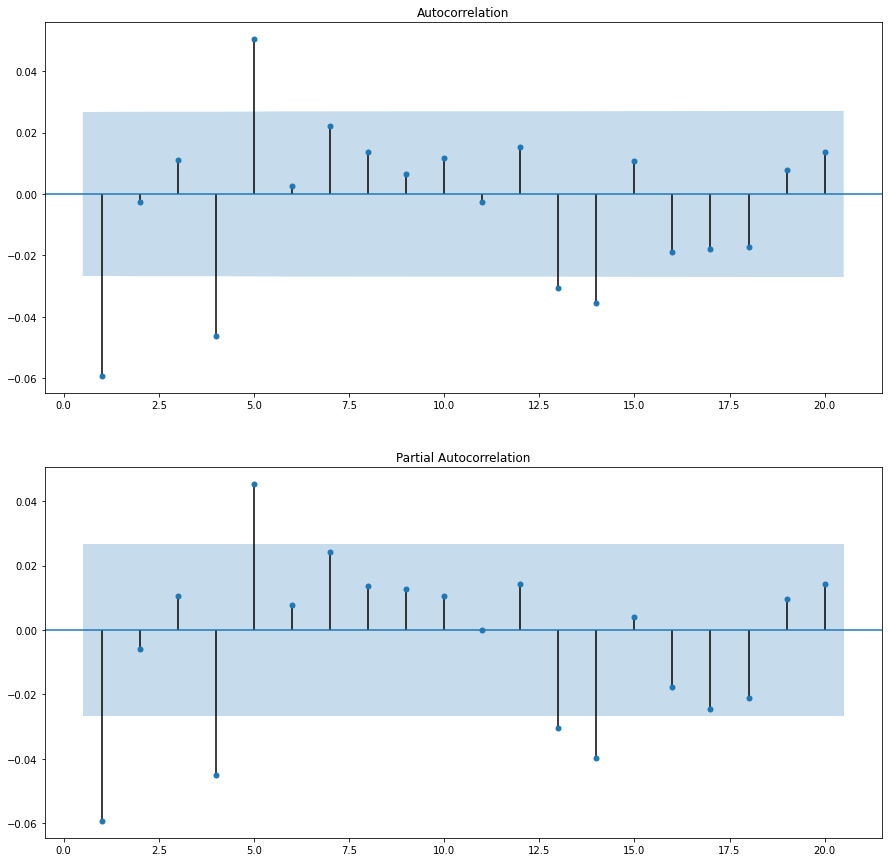

In [22]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
plot_acf(series_diff, ax=ax[0], lags=20, zero=False)
plot_pacf(series_diff, ax=ax[1], lags=20, zero=False)
plt.show();

      A lot of correlated residues can be seen from the ACF and PACF plots. 
      Therefore it will not be very suitable to model this stock price using 
      the ARIMA model. However a trial will be no harm.


In [23]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-7
for p in range(10):
  # Loop over q values from 0-7
    for q in range(9):

      try:
      	# create and fit ARMA(p,q) model
        model = ARIMA(X_train, order=(p,1,q))
        results = model.fit()

        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

      except:
            order_aic_bic.append((p, q, None, None))      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [24]:
calc_order = pd.DataFrame(order_aic_bic, columns=['p','q','AIC','BIC'])
calc_order.head()

,p,q,AIC,BIC
0,0,0,15882.510763,15889.105658
1,0,1,15865.691940,15878.881729
2,0,2,15867.685110,15887.469795
3,0,3,15869.430587,15895.810166
4,0,4,15862.818694,15895.793167


In [25]:
calc_order.sort_values(by='AIC', ascending=True).head()

,p,q,AIC,BIC
69,7,6,15823.336649,15915.665175
41,4,5,15827.212911,15893.161858
21,2,3,15829.913269,15869.482638
38,4,2,15831.393327,15877.557590
89,9,8,15831.771832,15950.479937


In [26]:
calc_order.sort_values(by='BIC', ascending=True).head()

,p,q,AIC,BIC
21,2,3,15829.913269,15869.482638
38,4,2,15831.393327,15877.557590
1,0,1,15865.691940,15878.881729
9,1,0,15865.813006,15879.002796
20,2,2,15853.477040,15886.451513


In [27]:
# Fit model with chosen order parameters
model = ARIMA(X_train, order=(2,1,3))
result = model.fit()

# print model summary
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 5405
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -7908.957
Date:                Sun, 23 Oct 2022   AIC                          15829.913
Time:                        18:52:31   BIC                          15869.483
Sample:                             0   HQIC                         15843.727
                               - 5405                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7123      0.003   -507.642      0.000      -1.719      -1.706
ar.L2         -0.9831      0.003   -310.402      0.000      -0.989      -0.977
ma.L1          1.6609      0.007    233.289      0.0

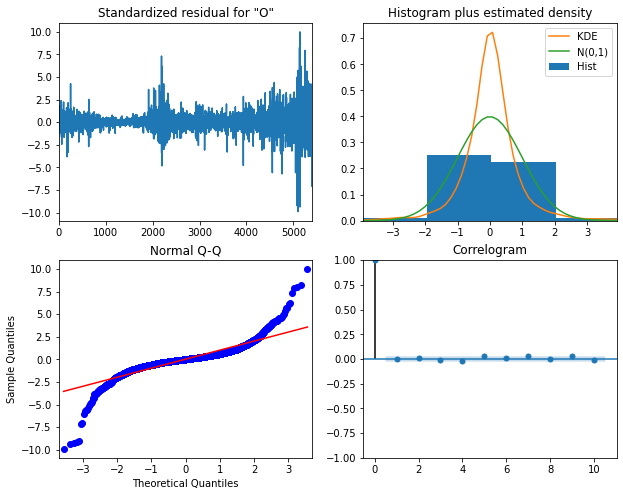

0.6341072419990019


In [28]:
# plot model diagnostics
result.plot_diagnostics(figsize=(10,8))
plt.show();

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(result.resid))

# Print mean absolute error
print(mae)

In [29]:
# Generate one-step ahead predictions
one_step_prediction = result.get_prediction(start=-4000)

# Extract prediction mean
mean_predicted = one_step_prediction.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_prediction.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Open']
upper_limits = confidence_intervals.loc[:,'upper Open']

# Print best estimate  predictions
print(mean_predicted.head())

Date
2005-08-05    23.409860
2005-08-08    23.344212
2005-08-09    23.340473
2005-08-10    23.164226
2005-08-11    23.295889
Name: predicted_mean, dtype: float64


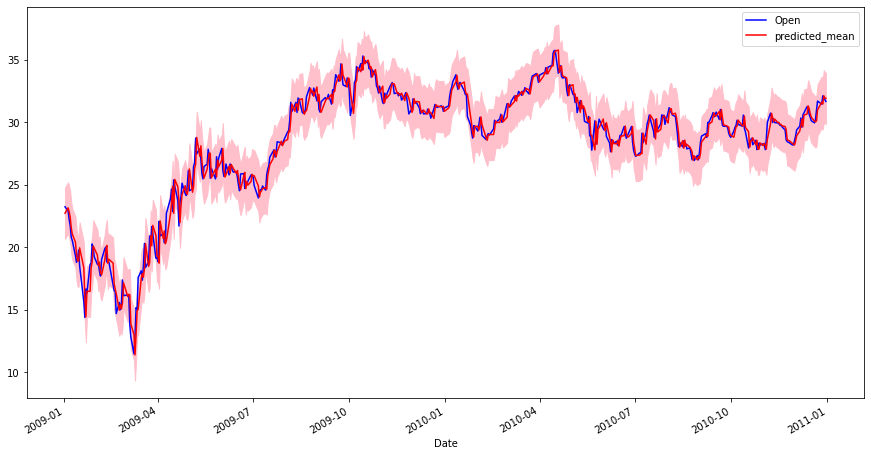

In [33]:
plt.figure(figsize=(15,8))

X_train.loc['2009':'2010',].plot(color='blue')
mean_predicted.loc['2009':'2010',].plot(color='red')

# shade the area between your confidence limits
plt.fill_between(mean_predicted.loc['2009':'2010',].index, lower_limits.loc['2009':'2010',], upper_limits.loc['2009':'2010',], color='pink')

plt.legend()
plt.show();

In [34]:
a = len(X_test)

# Generate one-step ahead predictions to predict test set
one_step_forecast = result.get_forecast(steps=a)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Open']
upper_limits = confidence_intervals.loc[:,'upper Open']

# Print best estimate  predictions
print(mean_forecast.head())

5405    152.709932
5406    152.581682
5407    152.627465
5408    152.675155
5409    152.548483
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [35]:
mean_forecast.index = X_test.index
lower_limits.index = X_test.index
upper_limits.index = X_test.index

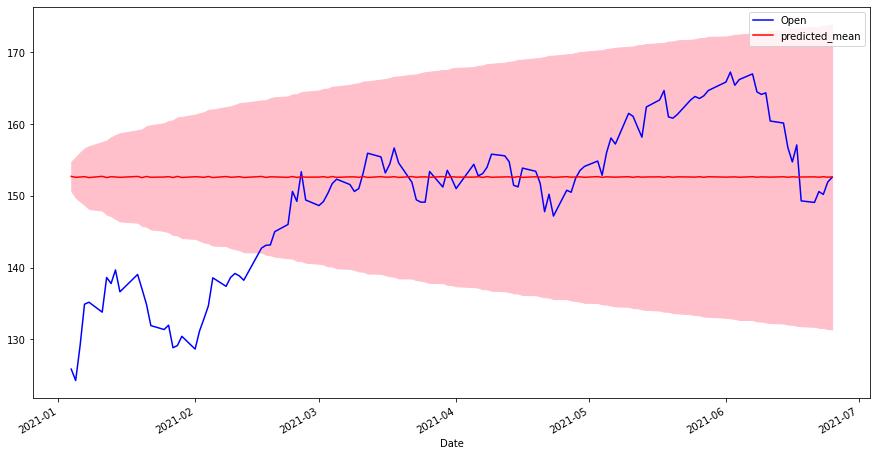

In [36]:
plt.figure(figsize=(15,8))

X_test.plot(color='blue')
mean_forecast.plot(color='red')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

plt.legend()
plt.show();

      The model utilized could not forecast accuractely the test set data therefore it is unreliable. We resort to machine modelling.